# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests  #loads the web pages needed
from bs4 import BeautifulSoup as bs
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = bs(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | An airline that lives in the...
1,✅ Trip Verified | Check-in Desk rude and dism...
2,✅ Trip Verified | I chose British Airways espe...
3,Not Verified | I booked Premium Economy from I...
4,✅ Trip Verified | A simple story with an unfor...


In [4]:
df

,reviews
0,✅ Trip Verified | An airline that lives in the...
1,✅ Trip Verified | Check-in Desk rude and dism...
2,✅ Trip Verified | I chose British Airways espe...
3,Not Verified | I booked Premium Economy from I...
4,✅ Trip Verified | A simple story with an unfor...
...,...
995,✅ Trip Verified | We flew from Los Angeles to ...
996,✅ Trip Verified | Brindisi to London. Flying ...
997,✅ Trip Verified | Chicago to London. I have f...
998,✅ Trip Verified | Berlin to London. It was a ...


Congratulations! Now you have your dataset for this task! The loops above collected 10000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

#### Removing the words before '|'

In [5]:
df.reviews = df.reviews.str.split('|', expand = True)[1]

In [6]:
df

,reviews
0,An airline that lives in their past glory and...
1,Check-in Desk rude and dismissive. Flight la...
2,I chose British Airways especially because I ...
3,I booked Premium Economy from INV to LAX (via...
4,A simple story with an unfortunate outcome th...
...,...
995,We flew from Los Angeles to Leeds Bradford vi...
996,Brindisi to London. Flying from any airport ...
997,Chicago to London. I have flown long haul ma...
998,Berlin to London. It was a connecting flight...


### Data Preprocessing

In [7]:
import re

def clean_text(text):
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

df['clean_review'] = df['reviews'].apply(clean_text)
df

,reviews,clean_review
0,An airline that lives in their past glory and...,An airline that lives in their past glory and...
1,Check-in Desk rude and dismissive. Flight la...,Check in Desk rude and dismissive Flight late...
2,I chose British Airways especially because I ...,I chose British Airways especially because I ...
3,I booked Premium Economy from INV to LAX (via...,I booked Premium Economy from INV to LAX via ...
4,A simple story with an unfortunate outcome th...,A simple story with an unfortunate outcome th...
...,...,...
995,We flew from Los Angeles to Leeds Bradford vi...,We flew from Los Angeles to Leeds Bradford vi...
996,Brindisi to London. Flying from any airport ...,Brindisi to London Flying from any airport th...
997,Chicago to London. I have flown long haul ma...,Chicago to London I have flown long haul many...
998,Berlin to London. It was a connecting flight...,Berlin to London It was a connecting flight s...


In [8]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to C:\Users\CHANDANA
[nltk_data]     SAI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\CHANDANA
[nltk_data]     SAI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\CHANDANA
[nltk_data]     SAI\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [9]:
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist 

df['POS_tagged'] = df['clean_review'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to C:\Users\CHANDANA
[nltk_data]     SAI\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\CHANDANA SAI\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,reviews,clean_review,POS_tagged
0,An airline that lives in their past glory and...,An airline that lives in their past glory and...,"[(airline, n), (lives, v), (past, a), (glory, ..."
1,Check-in Desk rude and dismissive. Flight la...,Check in Desk rude and dismissive Flight late...,"[(Check, n), (Desk, n), (rude, n), (dismissive..."
2,I chose British Airways especially because I ...,I chose British Airways especially because I ...,"[(chose, v), (British, a), (Airways, n), (espe..."
3,I booked Premium Economy from INV to LAX (via...,I booked Premium Economy from INV to LAX via ...,"[(booked, v), (Premium, n), (Economy, n), (INV..."
4,A simple story with an unfortunate outcome th...,A simple story with an unfortunate outcome th...,"[(simple, a), (story, n), (unfortunate, a), (o..."


### Lemmatization

In [10]:
from nltk.stem import WordNetLemmatizer

wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS_tagged'].apply(lemmatize)
df.head()

,reviews,clean_review,POS_tagged,Lemma
0,An airline that lives in their past glory and...,An airline that lives in their past glory and...,"[(airline, n), (lives, v), (past, a), (glory, ...",airline live past glory head future crisis B...
1,Check-in Desk rude and dismissive. Flight la...,Check in Desk rude and dismissive Flight late...,"[(Check, n), (Desk, n), (rude, n), (dismissive...",Check Desk rude dismissive Flight late seem ...
2,I chose British Airways especially because I ...,I chose British Airways especially because I ...,"[(chose, v), (British, a), (Airways, n), (espe...",choose British Airways especially go travel ...
3,I booked Premium Economy from INV to LAX (via...,I booked Premium Economy from INV to LAX via ...,"[(booked, v), (Premium, n), (Economy, n), (INV...",book Premium Economy INV LAX via LHR notify ...
4,A simple story with an unfortunate outcome th...,A simple story with an unfortunate outcome th...,"[(simple, a), (story, n), (unfortunate, a), (o...",simple story unfortunate outcome really coul...


In [13]:
!pip install vaderSentiment

                                              0.0/126.0 kB ? eta -:--:--
     -------------------                     61.4/126.0 kB 1.1 MB/s eta 0:00:01
     -------------------------------------- 126.0/126.0 kB 1.5 MB/s eta 0:00:00


In [15]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


analyzer = SentimentIntensityAnalyzer()

def vadersentimentanalysis(review: str) -> float:
    vs = analyzer.polarity_scores(review)
    return vs['compound']


df['Sentiment_value'] = df['Lemma'].apply(vadersentimentanalysis)

def vader_analysis(compound: float) -> str:
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'


df['Analysis'] = df['Sentiment_value'].apply(vader_analysis)
df

,reviews,clean_review,POS_tagged,Lemma,Sentiment_value,Analysis
0,An airline that lives in their past glory and...,An airline that lives in their past glory and...,"[(airline, n), (lives, v), (past, a), (glory, ...",airline live past glory head future crisis B...,-0.7351,Negative
1,Check-in Desk rude and dismissive. Flight la...,Check in Desk rude and dismissive Flight late...,"[(Check, n), (Desk, n), (rude, n), (dismissive...",Check Desk rude dismissive Flight late seem ...,-0.6705,Negative
2,I chose British Airways especially because I ...,I chose British Airways especially because I ...,"[(chose, v), (British, a), (Airways, n), (espe...",choose British Airways especially go travel ...,-0.8074,Negative
3,I booked Premium Economy from INV to LAX (via...,I booked Premium Economy from INV to LAX via ...,"[(booked, v), (Premium, n), (Economy, n), (INV...",book Premium Economy INV LAX via LHR notify ...,-0.5719,Negative
4,A simple story with an unfortunate outcome th...,A simple story with an unfortunate outcome th...,"[(simple, a), (story, n), (unfortunate, a), (o...",simple story unfortunate outcome really coul...,0.9112,Positive
...,...,...,...,...,...,...
995,We flew from Los Angeles to Leeds Bradford vi...,We flew from Los Angeles to Leeds Bradford vi...,"[(flew, v), (Los, n), (Angeles, n), (Leeds, n)...",fly Los Angeles Leeds Bradford via Heathrow ...,0.2263,Neutral
996,Brindisi to London. Flying from any airport ...,Brindisi to London Flying from any airport th...,"[(Brindisi, n), (London, n), (Flying, v), (air...",Brindisi London Flying airport include Ryana...,0.3612,Neutral
997,Chicago to London. I have flown long haul ma...,Chicago to London I have flown long haul many...,"[(Chicago, n), (London, n), (flown, v), (long,...",Chicago London fly long haul many time BA Vi...,0.5988,Positive
998,Berlin to London. It was a connecting flight...,Berlin to London It was a connecting flight s...,"[(Berlin, n), (London, n), (connecting, a), (f...",Berlin London connecting flight complain fli...,0.2991,Neutral


In [16]:
cnt = df['Analysis'].value_counts()
cnt

Positive    497
Negative    395
Neutral     108
Name: Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x23a286fc090>,
 [Text(0.01036707179294032, 1.0999511461071534, 'Positive'),
  Text(-0.3758612265358838, -1.0337931796964717, 'Negative'),
  Text(1.2730372826016982, -0.44930621752440103, 'Neutral')],
 [Text(0.005654766432512902, 0.5999733524220836, '49.7%'),
  Text(-0.20501521447411838, -0.5638871889253481, '39.5%'),
  Text(0.8015419927492173, -0.2828965073301784, '10.8%')])

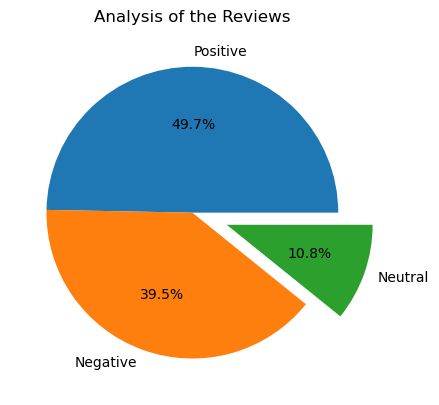

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,9))

plt.subplot(1,3,2)
plt.title("Analysis of the Reviews")
plt.pie(cnt.values, labels = cnt.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow = False)

In [18]:
df.to_csv("BA_reviews.csv")

#### WordCloud

In [20]:
!pip install WordCloud

                                              0.0/151.4 kB ? eta -:--:--
     ----------                            41.0/151.4 kB 991.0 kB/s eta 0:00:01
     -----------------------------------    143.4/151.4 kB 1.7 MB/s eta 0:00:01
     -------------------------------------- 151.4/151.4 kB 1.5 MB/s eta 0:00:00


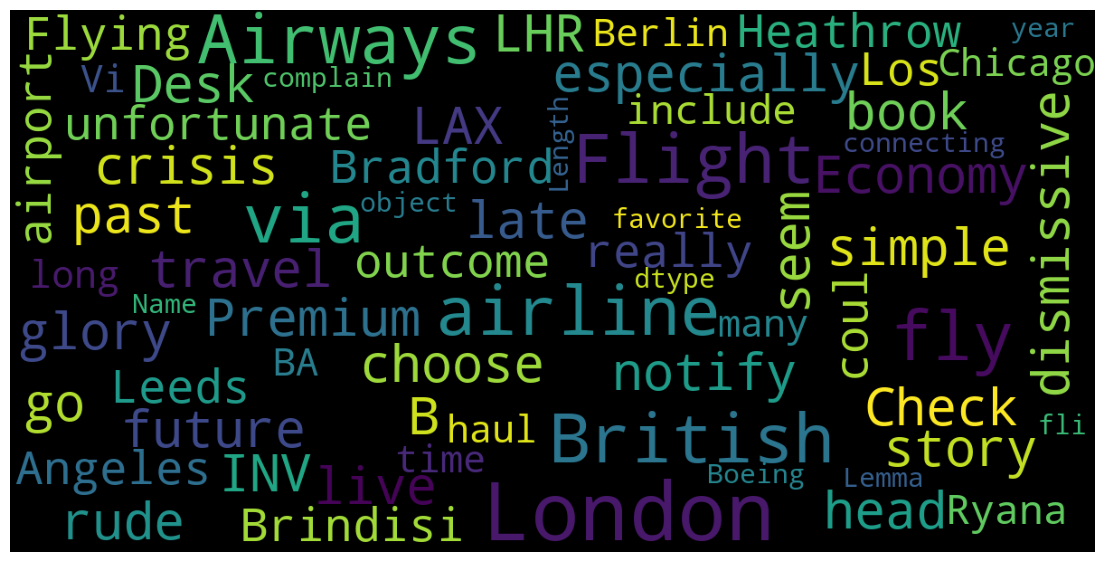

In [22]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color = 'Black',
        stopwords = stopwords,
        max_words = 100,
        max_font_size = 30,
        scale = 3,
        random_state = 1)

    wordcloud = wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(14, 14))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)